# Importing All Essential Libraries

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings 
warnings.filterwarnings("ignore")
import pandas.util.testing as tm 

In [0]:
#Since we have a very large dataset, we'll be hosting it on google drive and then reading here instead of uploading it
from google.colab import drive

In [4]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
loan_df = pd.read_csv('/content/drive/My Drive/loan.csv')

In [6]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0.0,Apr-2001,1.0,NaN,45.0,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,...,1.0,0.0,60124.0,16901.0,36500.0,18124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.52,0.0,Jun-1987,0.0,71.0,75.0,13.0,1.0,12315,24.2,44.0,w,29387.75,29387.75,1507.11,1507.11,...,1.0,0.0,372872.0,99468.0,15000.0,94072.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,490xx,MI,10.51,0.0,Apr-2011,0.0,NaN,NaN,8.0,0.0,4599,19.1,13.0,w,4787.21,4787.21,353.89,353.89,...,0.0,0.0,136927.0,11749.0,13800.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,MORTGAGE,92000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,985xx,WA,16.74,0.0,Feb-2006,0.0,NaN,NaN,10.0,0.0,5468,78.1,13.0,w,3831.93,3831.93,286.71,286.71,...,0.0,0.0,385183.0,36151.0,5000.0,44984.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,Mechanic,10+ years,MORTGAGE,57250.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,212xx,MD,26.35,0.0,Dec-2000,0.0,NaN,NaN,12.0,0.0,829,3.6,26.0,w,29339.02,29339.02,1423.21,1423.21,...,0.0,0.0,157548.0,29674.0,9300.0,32332.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


# Primitive Analysis

In [7]:
print("The length of the dataset is:", len(loan_df))
print("The shape of the dataset is:", loan_df.shape)

The length of the dataset is: 2260668
The shape of the dataset is: (2260668, 145)


Removing Data With More Than 40% Null Values

In [8]:
check_null = loan_df.isnull().sum(axis=0).sort_values(ascending=False)/float(len(loan_df))
check_null[check_null>0.40]

id                                            1.000000
member_id                                     1.000000
url                                           1.000000
orig_projected_additional_accrued_interest    0.996273
hardship_start_date                           0.995305
hardship_end_date                             0.995305
payment_plan_start_date                       0.995305
hardship_length                               0.995305
hardship_dpd                                  0.995305
hardship_loan_status                          0.995305
hardship_payoff_balance_amount                0.995305
deferral_term                                 0.995305
hardship_last_payment_amount                  0.995305
hardship_status                               0.995305
hardship_reason                               0.995305
hardship_type                                 0.995305
hardship_amount                               0.995305
settlement_percentage                         0.985378
settlement

In [0]:
remove = ['dti_joint','verification_status_joint','annual_inc_joint','il_util','mths_since_rcnt_il',
          'total_cu_tl','all_util','open_il_12m','total_bal_il','open_il_24m','inq_last_12m',
          'inq_fi','open_acc_6m','open_rv_12m','max_bal_bc','open_rv_24m','mths_since_last_record',
          'mths_since_recent_bc_dlq','mths_since_last_major_derog','mths_since_recent_revol_delinq','desc',
         'mths_since_last_delinq',
          'id',                                           
'member_id',                                     
'url',                                          
'orig_projected_additional_accrued_interest',    
'sec_app_mths_since_last_major_derog',           
'hardship_length',                               
'hardship_type',                                 
'hardship_reason',                               
'hardship_status',                               
'deferral_term',                                 
'hardship_amount',                               
'hardship_start_date',                           
'payment_plan_start_date',                       
'hardship_end_date',                            
'hardship_dpd',                                  
'hardship_loan_status',                          
'hardship_payoff_balance_amount',                
'hardship_last_payment_amount',                  
'sec_app_revol_util',                            
'revol_bal_joint',
'sec_app_mort_acc',                              
'sec_app_earliest_cr_line',                      
'sec_app_inq_last_6mths',                        
'sec_app_collections_12_mths_ex_med',            
'sec_app_chargeoff_within_12_mths',              
'sec_app_num_rev_accts',                         
'sec_app_open_act_il',
'sec_app_open_acc',                              
'next_pymnt_d',                                  
'settlement_percentage',                         
'settlement_term',                               
'settlement_status',                             
'settlement_amount',                             
'settlement_date',                               
'debt_settlement_flag_date',                     
'open_act_il']

In [10]:
remove

['dti_joint',
 'verification_status_joint',
 'annual_inc_joint',
 'il_util',
 'mths_since_rcnt_il',
 'total_cu_tl',
 'all_util',
 'open_il_12m',
 'total_bal_il',
 'open_il_24m',
 'inq_last_12m',
 'inq_fi',
 'open_acc_6m',
 'open_rv_12m',
 'max_bal_bc',
 'open_rv_24m',
 'mths_since_last_record',
 'mths_since_recent_bc_dlq',
 'mths_since_last_major_derog',
 'mths_since_recent_revol_delinq',
 'desc',
 'mths_since_last_delinq',
 'id',
 'member_id',
 'url',
 'orig_projected_additional_accrued_interest',
 'sec_app_mths_since_last_major_derog',
 'hardship_length',
 'hardship_type',
 'hardship_reason',
 'hardship_status',
 'deferral_term',
 'hardship_amount',
 'hardship_start_date',
 'payment_plan_start_date',
 'hardship_end_date',
 'hardship_dpd',
 'hardship_loan_status',
 'hardship_payoff_balance_amount',
 'hardship_last_payment_amount',
 'sec_app_revol_util',
 'revol_bal_joint',
 'sec_app_mort_acc',
 'sec_app_earliest_cr_line',
 'sec_app_inq_last_6mths',
 'sec_app_collections_12_mths_ex_med

In [0]:
loan_df_new = loan_df.drop(remove, axis=1)

In [12]:
loan_df_new.shape

(2260668, 87)

Status Of Loans Distributed By Lending Club

In [13]:
loan_df_new.loan_status.value_counts()

Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: loan_status, dtype: int64

In [0]:
loan_df_new = loan_df_new[-(loan_df_new.loan_status == 'Current')]

New Lenght Of Dataset

In [15]:
print("The length of the dataset is:", len(loan_df_new))
print("The shape of the dataset is:", loan_df_new.shape)

The length of the dataset is: 1340973
The shape of the dataset is: (1340973, 87)


Eliminate All Nan Values From Dataset

In [0]:
loan_df_new= loan_df_new[-(loan_df_new.loan_status.isnull())]

In [0]:
loan_df_new = loan_df_new[-(loan_df_new.loan_status=="In Grace Period")]

Removing All Unnecessary Symbols To Make All Numeric Values

In [0]:
loan_df_new['term'] = loan_df_new['term'].str.replace('months','')
loan_df_new['emp_length'] = loan_df_new['emp_length'].str.replace('+','')
loan_df_new['emp_length'] = loan_df_new['emp_length'].str.replace('<','')
loan_df_new['emp_length'] = loan_df_new['emp_length'].str.replace('years','')
loan_df_new['emp_length'] = loan_df_new['emp_length'].str.replace('year','')

In [19]:
loan_df_new['emp_length']

100         5 
152         1 
170        10 
186        10 
215         3 
          ... 
2260654     2 
2260655    10 
2260656    10 
2260658     1 
2260664     1 
Name: emp_length, Length: 1332021, dtype: object

In [0]:
loan_df_new['emp_length'] = pd.to_numeric(loan_df_new['emp_length'])
loan_df_new['emp_length'] = loan_df_new.emp_length.fillna(0)
loan_df_new['term'] = pd.to_numeric(loan_df_new['term'])

In [21]:
loan_df_new.shape

(1332021, 87)

Removing Last 2 Rows That Do Not Contain Any Data

In [0]:
loan_df_new = loan_df_new[:-2]

In [23]:
loan_df_new.shape

(1332019, 87)

In [0]:
clean_data=loan_df_new

Finding Correlation Between Variables

In [25]:
loan_df_new.corr() 

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
loan_amnt,1.000000,0.999541,0.998196,0.382627,0.144841,0.952989,0.112982,0.308144,0.032723,-0.002193,-0.019511,0.185908,-0.065043,0.315039,0.106632,0.207813,0.107744,0.107745,0.841326,0.840726,0.777364,0.625231,0.094895,0.185011,0.176834,0.494379,-0.017843,NaN,0.001657,-0.003323,0.313905,0.313268,0.009982,0.228829,0.198385,0.051217,-0.000587,0.000511,0.122777,0.162267,0.047641,0.024095,0.222276,0.031619,-0.000702,-0.049981,0.194528,0.151707,0.213684,0.195488,0.077940,0.165980,0.169273,0.151138,0.182512,-0.000423,0.002456,-0.022148,-0.020198,0.088367,0.020294,-0.093868,0.007630,0.334486,0.275774,0.371362,0.200266
funded_amnt,0.999541,1.000000,0.998765,0.381823,0.144943,0.953666,0.113067,0.308032,0.033133,-0.001994,-0.019897,0.186218,-0.064793,0.314913,0.106807,0.207747,0.107906,0.107907,0.841562,0.841057,0.777685,0.625029,0.094979,0.185145,0.177045,0.494783,-0.017732,NaN,0.001724,-0.003323,0.313905,0.313267,0.009983,0.228829,0.198392,0.051211,-0.000503,0.000531,0.122777,0.162267,0.047641,0.024096,0.222278,0.031617,-0.000699,-0.049983,0.194528,0.151706,0.213683,0.195487,0.077938,0.165979,0.169271,0.151138,0.182512,-0.000423,0.002456,-0.022150,-0.020201,0.088367,0.020293,-0.093667,0.007766,0.334485,0.275773,0.371369,0.200263
funded_amnt_inv,0.998196,0.998765,1.000000,0.382140,0.145042,0.952261,0.113746,0.307490,0.034254,-0.001682,-0.022801,0.186640,-0.064097,0.313793,0.106931,0.207844,0.108123,0.108124,0.840650,0.842126,0.776905,0.624165,0.094502,0.184872,0.176683,0.495080,-0.017437,NaN,0.001849,-0.003323,0.313928,0.313288,0.009973,0.228850,0.198448,0.051151,-0.000308,0.000568,0.122787,0.162285,0.047649,0.024096,0.222291,0.031627,-0.000735,-0.050000,0.194513,0.151681,0.213683,0.195471,0.077934,0.165971,0.169259,0.151112,0.182506,-0.000436,0.002446,-0.022163,-0.020218,0.088380,0.020242,-0.093284,0.008069,0.334513,0.275781,0.371402,0.200267
term,0.382627,0.381823,0.382140,1.000000,0.417909,0.143916,0.069098,0.049645,0.060543,-0.007870,0.016940,0.071577,-0.019290,0.071009,0.062164,0.098090,0.084375,0.084389,0.291851,0.292257,0.178875,0.485236,0.035615,0.175148,0.163565,0.278669,-0.008093,NaN,-0.000051,-0.001381,0.103399,0.055875,0.049811,0.076876,0.008753,0.047141,-0.001230,-0.000586,0.058768,0.032586,0.001479,-0.024282,0.099523,0.004001,-0.027189,-0.015453,0.044035,0.050870,0.045646,0.046890,0.073960,0.050236,0.053168,0.051250,0.073164,-0.000517,-0.000081,-0.010733,0.025803,0.043925,0.045393,-0.010449,-0.011955,0.099303,0.097507,0.057468,0.082527
int_rate,0.144841,0.144943,0.145042,0.417909,1.000000,0.157552,-0.006383,-0.070256,0.147113,0.048057,0.209799,-0.003812,0.052282,-0.027770,0.239775,-0.043279,0.074364,0.074366,0.073730,0.073920,-0.052582,0.404680,0.077257,0.182126,0.168463,0.079199,0.015312,NaN,0.016906,0.002317,-0.084826,-0.160559,0.189837,-0.084033,-0.278664,0.250103,0.011494,0.005387,-0.071254,-0.138047,-0.106750,-0.127886,-0.084483,-0.084523,-0.168695,0.042908,0.022600,0.085569,-0.053732,-0.085030,0.011106,-0.008973,-0.058089,0.085331,-0.009546,0.005993

from the above correlation matrix we can see that the loan_amt, funded_amt, funded_amt invested are nearly equal (1). Therefore we can eliminate any 2 of them.

In [0]:
loan_df_new.drop("funded_amnt",1, inplace=True)

In [0]:
loan_df_new.drop("funded_amnt_inv", 1, inplace=True)

In [28]:
loan_df_new.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,...,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
100,30000,36,22.35,1151.16,D,D5,Supervisor,5.0,MORTGAGE,100000.0,Source Verified,Dec-2018,Fully Paid,n,debt_consolidation,Debt consolidation,917xx,CA,30.46,0.0,Jan-2012,0.0,11.0,1.0,15603,37.0,19.0,w,0.0,0.0,30026.442500,30026.44,30000.0,26.44,0.0,0.0,0.0,Jan-2019,30082.32,Jan-2019,...,472330.0,42200.0,4.0,42939.0,15181.0,46.9,0.0,0.0,83.0,73.0,23.0,2.0,1.0,23.0,8.0,0.0,3.0,4.0,3.0,5.0,10.0,6.0,8.0,4.0,11.0,0.0,0.0,0.0,2.0,89.5,33.3,1.0,0.0,527120.0,98453.0,28600.0,101984.0,N,Cash,N
152,40000,60,16.14,975.71,C,C4,Assistant to the Treasurer (Payroll),1.0,MORTGAGE,45000.0,Verified,Dec-2018,Fully Paid,n,credit_card,Credit card refinancing,456xx,OH,50.53,0.0,Jun-2009,0.0,18.0,0.0,34971,64.5,37.0,w,0.0,0.0,40856.678960,40856.68,40000.0,856.68,0.0,0.0,0.0,Feb-2019,40910.48,Feb-2019,...,271068.0,54200.0,5.0,15059.0,14930.0,67.3,0.0,0.0,114.0,70.0,2.0,2.0,1.0,2.0,9.0,0.0,7.0,9.0,7.0,7.0,26.0,9.0,10.0,9.0,18.0,0.0,0.0,0.0,4.0,100.0,42.9,0.0,0.0,344802.0,161720.0,45700.0,167965.0,N,Cash,N
170,20000,36,7.56,622.68,A,A3,Teacher,10.0,MORTGAGE,100000.0,Not Verified,Dec-2018,Fully Paid,n,credit_card,Credit card refinancing,982xx,WA,18.92,0.0,Feb-1999,0.0,9.0,0.0,25416,29.9,19.0,w,0.0,0.0,20215.792430,20215.79,20000.0,215.79,0.0,0.0,0.0,Feb-2019,20228.39,Feb-2019,...,515779.0,85100.0,5.0,57309.0,59684.0,29.9,0.0,0.0,171.0,238.0,1.0,1.0,5.0,1.0,13.0,0.0,5.0,5.0,5.0,6.0,5.0,5.0,9.0,5.0,9.0,0.0,0.0,0.0,1.0,94.7,20.0,0.0,0.0,622183.0,71569.0,85100.0,74833.0,N,Cash,N
186,4500,36,11.31,147.99,B,B3,Accounts Examiner III,10.0,RENT,38500.0,Not Verified,Dec-2018,Fully Paid,n,credit_card,Credit card refinancing,786xx,TX,4.64,0.0,Dec-2003,0.0,12.0,0.0,4472,15.3,25.0,w,0.0,0.0,4549.217149,4549.22,4500.0,49.22,0.0,0.0,0.0,Feb-2019,4553.46,Feb-2019,...,29137.0,29200.0,8.0,2428.0,10735.0,28.9,0.0,0.0,180.0,69.0,2.0,2.0,0.0,2.0,6.0,1.0,3.0,5.0,5.0,6.0,10.0,11.0,15.0,5.0,12.0,0.0,0.0,0.0,4.0,91.7,0.0,0.0,0.0,53795.0,29137.0,15100.0,24595.0,N,Cash,N
215,8425,36,27.27,345.18,E,E5,Senior Director Risk Management,3.0,MORTGAGE,450000.0,Verified,Dec-2018,Fully Paid,n,credit_card,Credit card refinancing,020xx,MA,12.37,0.0,Oct-1997,0.0,21.0,0.0,36812,65.7,37.0,w,0.0,0.0,8735.148975,8735.15,8425.0,310.15,0.0,0.0,0.0,Feb-2019,8754.30,Feb-2019,...,690320.0,56000.0,10.0,34516.0,11632.0,74.6,0.0,0.0,254.0,89.0,12.0,12.0,4.0,18.0,4.0,0.0,6.0,8.0,8.0,10.0,16.0,13.0,17.0,8.0,21.0,0.0,0.0,0.0,2.0,100.0,50.0,0.0,0.0,768304.0,189194.0,45800.0,189054.0,N,Cash,N


# Exploratory Data Analysis

Box Plot: - Mean Loan Amount

In [29]:
print('The mean of the loan amount of the dataset is ', loan_df_new.loan_amnt.mean())

The mean of the loan amount of the dataset is  14450.726941582665


Mean loan amount is:  14450.726941582665


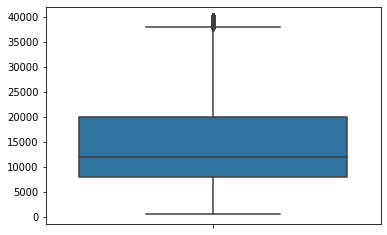

In [30]:
loan_amount = loan_df_new["loan_amnt"].values
sns.boxplot(y=loan_amount)
print ("Mean loan amount is: ",loan_amount.mean())
# Most loans were between 8000 and 20000 dollars

In [0]:
clean_data=loan_df_new

Bar Graph: - Loan Status Of All Loans

Loan Statuses Counts


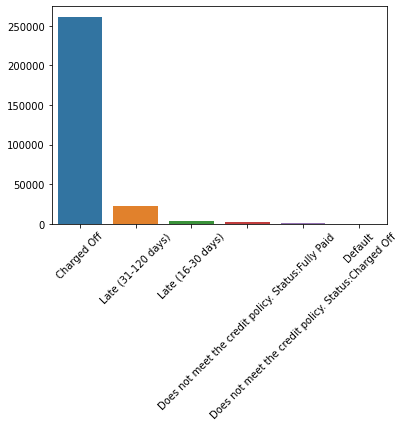

In [32]:
status_counts = loan_df_new.loan_status.value_counts()[1:]
# Removing current loans as they will not be useful for our analysis
ax = sns.barplot(status_counts.index, status_counts.values)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
print("Loan Statuses Counts")

In [0]:
#Average loan amount disbursed over the period of 2007-2015 (months included)

In [0]:
loan_df_new['year'] = pd.DatetimeIndex(loan_df_new['issue_d']).year

In [0]:
#Average loan amount disbursed over the period of 2007-2015. From this we can see that the loans distributed are highest in the years of 2018 
#followed by 2013. Also a steady increase has been observed in the loans distributed from 2007-2012 

In [36]:
loan_df_new['addr_state'].unique

<bound method Series.unique of 100        CA
152        OH
170        WA
186        TX
215        MA
           ..
2260650    CA
2260652    UT
2260654    NY
2260655    TX
2260656    IL
Name: addr_state, Length: 1332019, dtype: object>

Make A List With Each Of The Regions By State

In [0]:
loan_df_new['addr_state'].unique()

# Make a list with each of the regions by state.

west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west = ['AZ', 'TX', 'NM', 'OK']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']



loan_df_new['region'] = np.nan

def finding_regions(state):
    if state in west:
        return 'West'
    elif state in south_west:
        return 'SouthWest'
    elif state in south_east:
        return 'SouthEast'
    elif state in mid_west:
        return 'MidWest'
    elif state in north_east:
        return 'NorthEast'
    


loan_df_new['region'] = loan_df_new['addr_state'].apply(finding_regions)

In [38]:
loan_df_new['region']

100             West
152          MidWest
170             West
186        SouthWest
215        NorthEast
             ...    
2260650         West
2260652         West
2260654    NorthEast
2260655    SouthWest
2260656      MidWest
Name: region, Length: 1332019, dtype: object

Convert current date and transform it into a year-month format

In [0]:
loan_df_new['complete_date'] = pd.to_datetime(loan_df_new['issue_d'])

group_dates = loan_df_new.groupby(['complete_date', 'region'], as_index=False).sum()

group_dates['issue_d'] = [month.to_period('M') for 
                          month in group_dates['complete_date']]

group_dates = group_dates.groupby(['issue_d', 'region'], as_index=False).sum()
group_dates = group_dates.groupby(['issue_d', 'region'], as_index=False).sum()
group_dates['loan_amnt'] = group_dates['loan_amnt']/1000


df_dates = pd.DataFrame(data=group_dates[['issue_d','region','loan_amnt']])

# Region-wise distribution of the loan amount distributed among the different states

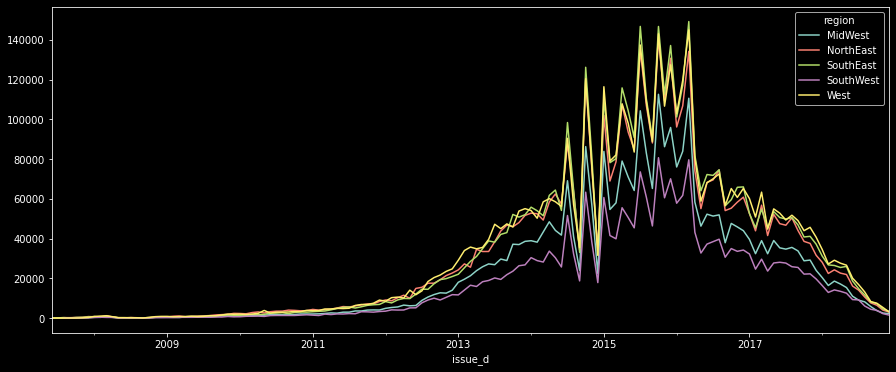

In [40]:
cmap = plt.cm.Set3
plt.style.use('dark_background')
by_issued_amount = df_dates.groupby(['issue_d', 'region']).loan_amnt.sum()
by_issued_amount.unstack().plot(stacked=False, colormap=cmap, grid=False, legend=True, figsize=(15,6))
#from this we can see that the west zone has the highest number of issued amount for loans. However this amount for the same as well as the rest of the states has decreased since 2016.

# Understanding the correlation between loan amount, funded amount and invested amount 

Text(0.5, 1.0, 'Total committed by Investors')

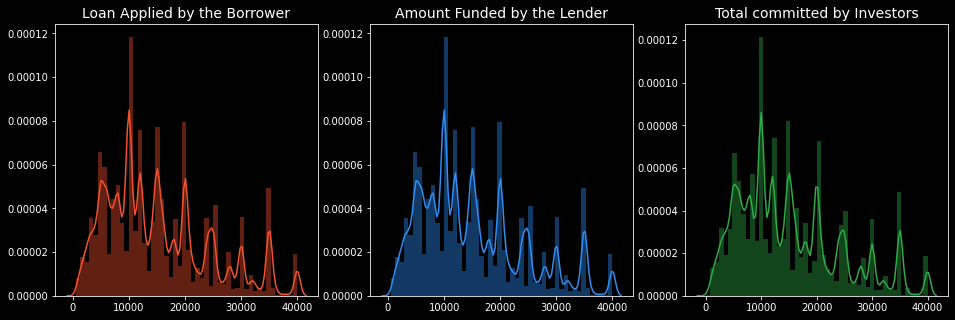

In [41]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))




loan_amount = loan_df["loan_amnt"].values
funded_amount = loan_df["funded_amnt"].values
investor_funds = loan_df["funded_amnt_inv"].values


sns.distplot(loan_amount, ax=ax[0], color="#F7522F")
ax[0].set_title("Loan Applied by the Borrower", fontsize=14)
sns.distplot(funded_amount, ax=ax[1], color="#2F8FF9")
ax[1].set_title("Amount Funded by the Lender", fontsize=14)
sns.distplot(investor_funds, ax=ax[2], color="#2EAD46")
ax[2].set_title("Total committed by Investors", fontsize=14)

# Classifying the loan into good loans and bad loans based on the loan status

In [42]:

loan_df["loan_status"].value_counts()

Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: loan_status, dtype: int64

To understand and classify the loans into the good loans and bad loans we need to understand some terminologies related to the loan status: 
**1. Charged Off: **
It means that the original creditor has given up on being repaid according to the original terms of the loan. It considers the remaining balance to be bad debt, but that doesn't mean you no longer owe the amount that has not been repaid

**2. In Grace Period: **
In grace period allows a borrower or insurance customer to delay payment for a short period of time beyond the due date. During this period, no late fees are charged, and the delay cannot result in default or cancellation of the loan or contract

Hence, current loans cannot be classified either as good loans or bad loans


**Bad Loans analysis**

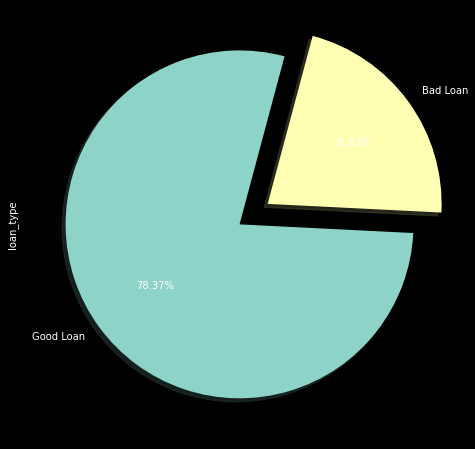

In [43]:
# Various types of bad loans
bad_loan = ["Charged Off", "Default", "Does not meet the credit policy. Status:Charged Off", "In Grace Period", "Late (16-30 days)", "Late (31-120 days)"]

# Creating an empty column to store the laon type
loan_df_new['loan_type'] = np.nan

# Function to set the loan type
def loan_type(status):
    if status in bad_loan:
        return 'Bad Loan'
    else:
        return 'Good Loan'
    
# Applying the function to all the statuses    
loan_df_new['loan_type'] = loan_df_new['loan_status'].apply(loan_type)

# Making a pie chart of good loans and bad loans
plt.figure(figsize=(8,8))
loan_df_new.loan_type.value_counts().plot.pie(explode = [0, 0.2],autopct='%1.2f%%', shadow = True, startangle = 75)


In [0]:
loan_df_new['issue_month'], loan_df_new['issue_year'] = loan_df_new['issue_d'].str.split('-', 1).str

In [0]:
loan_df_new.drop("year", 1, inplace=True)

In [ ]:
loan_df_new.drop("complete_date", 1, inplace=True)

# Yearly and Monthly distribution of Loans

(0.0, 311338.5)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


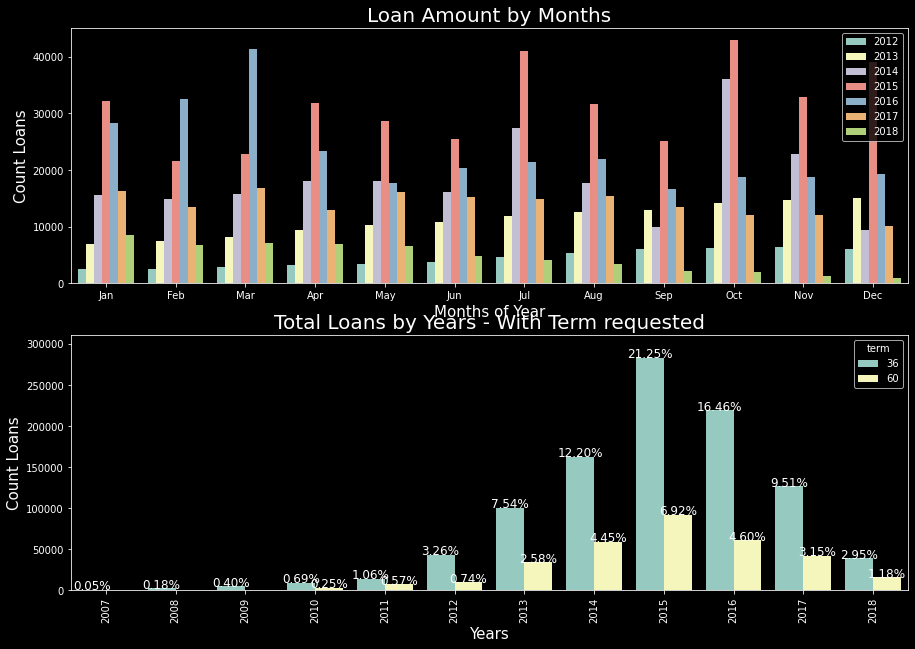

In [47]:
total = len(loan_df_new)
months_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
loan_df_new['issue_month'] = pd.Categorical(loan_df_new['issue_month'],
                                        categories=months_order, 
                                        ordered=True)
#Issue_d x loan_amount
plt.figure(figsize = (15,16))

plt.subplot(311)
g = sns.countplot(x='issue_month', hue='issue_year', 
                  data=loan_df_new[loan_df_new['issue_year'].astype(int) >= 2012])
#g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Months of Year", fontsize=15)
g.set_ylabel("Count Loans", fontsize=15)
g.legend(loc='best')
g.set_title("Loan Amount by Months", fontsize=20)

plt.subplot(312)
#Looking the count of defaults though the issue_d that is The month which the loan was funded
g1 = sns.countplot(x='issue_year', hue='term', 
                   data=loan_df_new)
g1.set_xticklabels(g1.get_xticklabels(),rotation=90)
g1.set_xlabel("Years", fontsize=15)
g1.set_ylabel("Count Loans", fontsize=15)
g1.set_title("Total Loans by Years - With Term requested", fontsize=20)
sizes=[]
for p in g1.patches:
    height = p.get_height()
    sizes.append(height)
    g1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g1.set_ylim(0, max(sizes) * 1.10)

#plt.subplot(313)


# State-wise distribution to understand the which states are performing poorly

<BarContainer object of 51 artists>

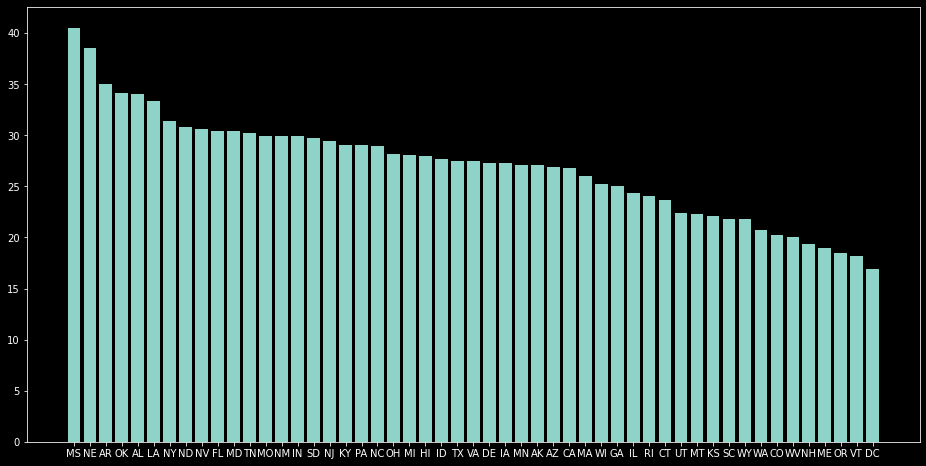

In [48]:
# Finding bad loan rate statewise
# Making a dictionary of ratio of bad loans to good loans
d = {}
for state in loan_df_new['addr_state'].unique():
    values = loan_df_new[loan_df_new['addr_state']==state].loan_type.value_counts()
# Taking value counts of good and bad loans and finding the ratio
# Rounding off to second decimal
    d[state] = round(float(values[1])/float(values[0])*100,2)
    
# Sorting the created dictionary by the ratio, in descending order
import operator
sorted_d = sorted(d.items(), key=operator.itemgetter(1), reverse=True) 
x, y = zip(*sorted_d) 

# Plotting the bad loan rates, statewise
plt.figure(figsize=(16,8))
plt.bar(x,y)
# Missisipi, Nebraska and Arkansas are least safest 
# Safest states Washington DC, Vermont, Or

In [0]:
my_list = ['Fully Paid',  'Current', 'Charged Off', 'In Grace Period']

In [0]:
loan_status_trimmed= loan_df[np.in1d(loan_df.loan_status, my_list)]

In [51]:
loan_status_trimmed

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0.0,Apr-2001,1.0,NaN,45.0,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.020000,167.02,...,1.0,0.0,60124.0,16901.0,36500.0,18124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.52,0.0,Jun-1987,0.0,71.0,75.0,13.0,1.0,12315,24.2,44.0,w,29387.75,29387.75,1507.110000,1507.11,...,1.0,0.0,372872.0,99468.0,15000.0,94072.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,490xx,MI,10.51,0.0,Apr-2011,0.0,NaN,NaN,8.0,0.0,4599,19.1,13.0,w,4787.21,4787.21,353.890000,353.89,...,0.0,0.0,136927.0,11749.0,13800.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,MORTGAGE,92000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,985xx,WA,16.74,0.0,Feb-2006,0.0,NaN,NaN,10.0,0.0,5468,78.1,13.0,w,3831.93,3831.93,286.710000,286.71,...,0.0,0.0,385183.0,36151.0,5000.0,44984.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,Mechanic,10+ years,MORTGAGE,57250.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,212xx,MD,26.35,0.0,Dec-2000,0.0,NaN,NaN,12.0,0.0,829,3.6,26.0,w,29339.02,29339.02,1423.210000,1423.21,...,0.0,0.0,157548.0,29674.0,9300.0,32332.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260663,NaN,NaN,12000,12000,12000.0,60 months,14.08,279.72,C,C3,house keeper,10+ years,MORTGAGE,58000.0,Not Verified,Oct-2017,Curr

# Exploring the loan_status x purpose

In [52]:

purp_loan= ['purpose', 'loan_status']
cm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(loan_df_new[purp_loan[0]], loan_status_trimmed[purp_loan[1]], 
                   normalize='columns') * 100,2)).style.background_gradient(cmap = cm)


loan_status,Charged Off,Fully Paid
purpose,,
car,0.790000,1.160000
credit_card,18.590000,22.750000
debt_consolidation,61.550000,57.250000
educational,0.020000,0.030000
home_improvement,5.770000,6.660000
house,0.580000,0.520000
major_purchase,2.030000,2.210000
medical,1.260000,1.130000
moving,0.820000,0.670000


# Exploring the loan_status x grade

In [53]:
loan_grade = ['loan_status', 'grade']
cm = sns.light_palette("purple", as_cmap=True)
round(pd.crosstab(loan_df_new[loan_grade[0]], loan_status_trimmed[loan_grade[1]], 
            values=loan_df_new['int_rate'], aggfunc='mean'),2).fillna(0).style.background_gradient(cmap = cm)

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,7.390000,10.790000,14.070000,17.760000,21.160000,25.050000,27.910000
Fully Paid,7.110000,10.670000,14.010000,17.670000,21.070000,24.770000,27.470000
